In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
income_df = pd.read_csv("/content/drive/MyDrive/adultML(Abi).csv")
income_df.head()

,age,workclass,Fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
income_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names =  ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'predclass']
income_df = pd.read_csv(income_data, na_values=[" ?"],
                         header=None,
                         names = names)
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
income_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
predclass            0
dtype: int64

In [ ]:
income_df.age = income_df.age.astype(float)
income_df['hours_per_week'] = income_df['hours_per_week'].astype(float)

In [ ]:
my_df = income_df.dropna()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  object 
 2   fnlwgt          30162 non-null  int64  
 3   education       30162 non-null  object 
 4   education_num   30162 non-null  int64  
 5   marital_status  30162 non-null  object 
 6   occupation      30162 non-null  object 
 7   relationship    30162 non-null  object 
 8   race            30162 non-null  object 
 9   sex             30162 non-null  object 
 10  capital_gain    30162 non-null  int64  
 11  capital_loss    30162 non-null  int64  
 12  hours_per_week  30162 non-null  float64
 13  native_country  30162 non-null  object 
 14  predclass       30162 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [ ]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
predclass         0
dtype: int64

In [ ]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital_status',my_df['marital_status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('race',my_df.race.unique())
print('native_country',my_df['native_country'].unique())
print('predclass',my_df.predclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
native_country [' United-States' '

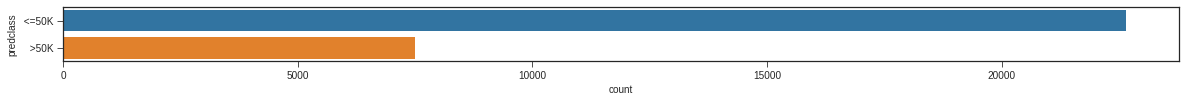

In [ ]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df, order=my_df['predclass'].value_counts().index)

In [ ]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
my_df[['education','education_num']].groupby(['education'], as_index=False).mean().sort_values(by='education_num', ascending=False)

,education,education_num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


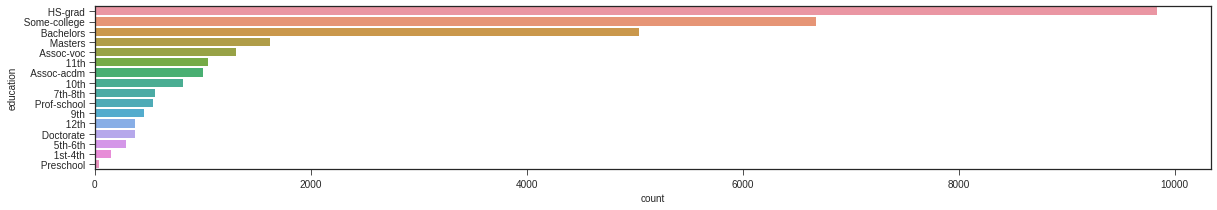

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df, order=my_df['education'].value_counts().index)

In [ ]:
my_df['marital_status'].replace(' Never-married', 'NotMarried',inplace=True)
my_df['marital_status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
my_df['marital_status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
my_df['marital_status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital_status'].replace([' Separated'], 'Separated',inplace=True)
my_df['marital_status'].replace([' Divorced'], 'Separated',inplace=True)
my_df['marital_status'].replace([' Widowed'], 'Widowed',inplace=True)

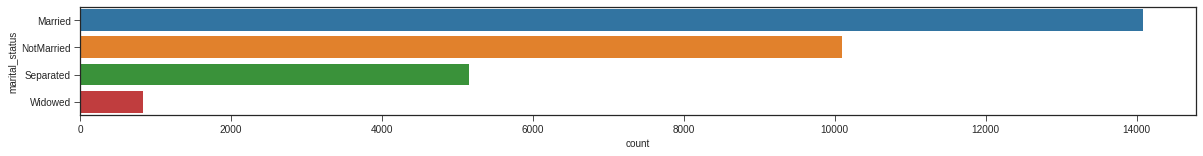

In [ ]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=my_df, order=my_df['marital_status'].value_counts().index)

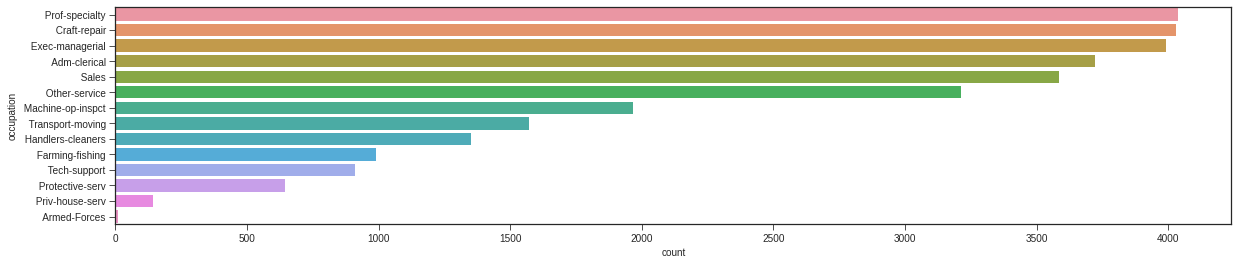

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y="occupation", data=my_df, order=my_df['occupation'].value_counts().index)

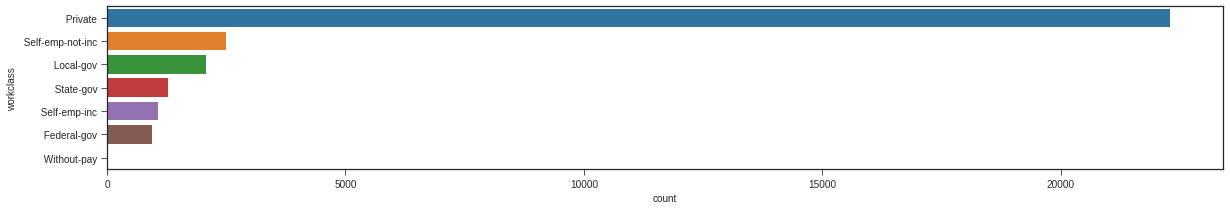

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3))
sns.countplot(y="workclass", data=my_df, order=my_df['workclass'].value_counts().index)

In [ ]:
my_df['age_bin'] = pd.cut(my_df['age'], 20)

In [ ]:
my_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.95911
0,<=50K,36.60806


<Figure size 1440x360 with 0 Axes>

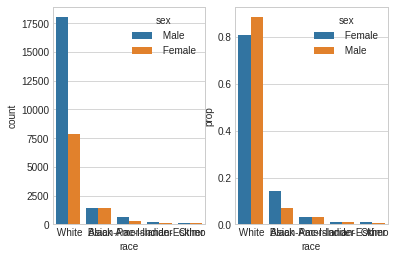

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
plt.figure(figsize=(20,5))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [ ]:
my_df['hours_per_week_bin'] = pd.cut(my_df['hours_per_week'], 10)
my_df['hours_per_week'] = my_df['hours_per_week']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


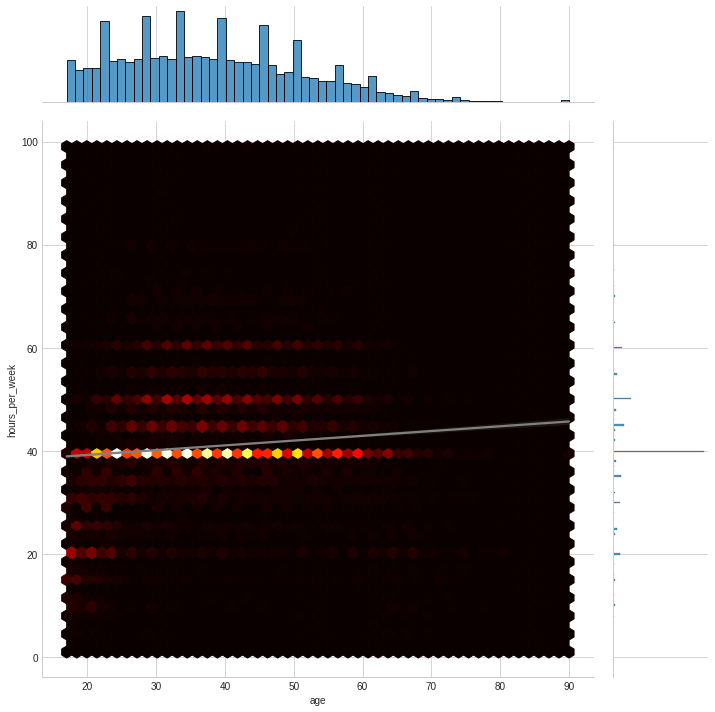

In [ ]:
g = sns.jointplot(x = 'age',
              y = 'hours_per_week',
              data = my_df,
              kind = 'hex',
              cmap= 'hot',
              size=10)

sns.regplot(my_df.age, my_df['hours_per_week'], ax=g.ax_joint, scatter=False, color='grey')

In [ ]:
# Crossing Numerical Features
my_df['age_hours'] = my_df['age']*my_df['hours_per_week']
my_df['age_hours_bin'] = pd.cut(my_df['age_hours'], 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


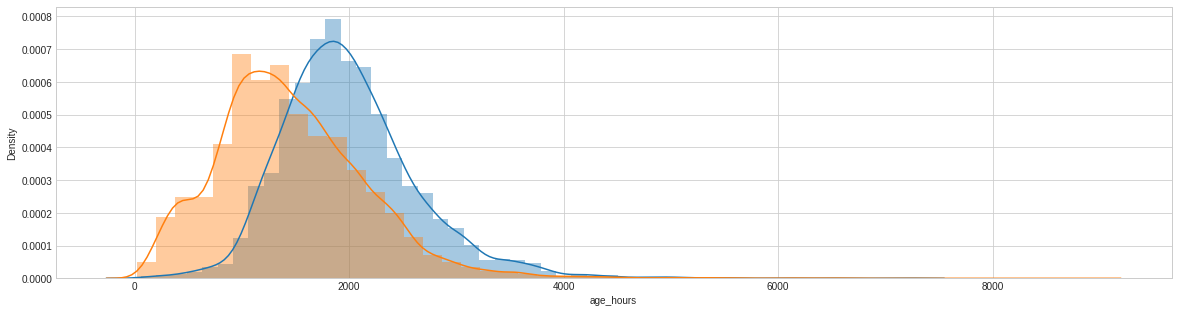

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
sns.distplot(my_df[my_df['predclass'] == ' >50K']['age_hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['predclass'] == ' <=50K']['age_hours'], kde_kws={"label": "<$50K"})

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,predclass,age_bin,hours_per_week_bin,age_hours,age_hours_bin
0,22,5,2491,9,12,1,0,1,4,1,24,0,39,38,0,6,3,589,1
1,33,4,2727,9,12,0,3,0,4,1,0,0,12,38,0,9,1,257,0
2,21,2,13188,11,8,2,5,1,4,1,0,0,39,38,0,5,3,578,1
3,36,2,14354,1,6,0,5,0,2,1,0,0,39,38,0,9,3,766,2
4,11,2,18120,9,12,0,9,5,2,0,0,0,39,4,0,3,3,437,1


In [ ]:
drop_elements = ['education', 'native_country', 'predclass', 'age_bin','age_hours_bin','hours_per_week_bin']
y = my_df["predclass"]
X = my_df.drop(drop_elements, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7062821150339798

In [ ]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7287019920499147

In [ ]:
#a)Decision Tree Classifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
#y_pred = DecisionTree.predict(X_test)
score_DecisionTree = DecisionTree.score(X_test,y_test)
from sklearn.metrics import f1_score,recall_score,precision_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('misclassification percentage:',1-score_DecisionTree)
print('The accuracy of the Decision Tree Model is', score_DecisionTree)

F-Measure: 0.481
Recall: 0.706
Precision: 0.706
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4508
           1       0.43      0.54      0.48      1525

    accuracy                           0.71      6033
   macro avg       0.63      0.65      0.64      6033
weighted avg       0.73      0.71      0.72      6033

[[3440 1068]
 [ 704  821]]
misclassification percentage: 0.1945963865406929
The accuracy of the Decision Tree Model is 0.8054036134593071


In [ ]:
#b)Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
from sklearn.metrics import f1_score,recall_score,precision_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('misclassification percentage:',1-score_randomforest)
print('The accuracy of the Random Forest Model is', score_randomforest)

F-Measure: 0.481
Recall: 0.706
Precision: 0.706
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4508
           1       0.43      0.54      0.48      1525

    accuracy                           0.71      6033
   macro avg       0.63      0.65      0.64      6033
weighted avg       0.73      0.71      0.72      6033

[[3440 1068]
 [ 704  821]]
misclassification percentage: 0.14785347256754522
The accuracy of the Random Forest Model is 0.8521465274324548


In [ ]:
#c)Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=3000)
logreg.fit(X_train, y_train)
#y_pred =logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
from sklearn.metrics import f1_score,recall_score,precision_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('misclassification percentage:',1- score_logreg)
print('The accuracy of the Logistic Regression is', score_logreg)

F-Measure: 0.481
Recall: 0.706
Precision: 0.706
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4508
           1       0.43      0.54      0.48      1525

    accuracy                           0.71      6033
   macro avg       0.63      0.65      0.64      6033
weighted avg       0.73      0.71      0.72      6033

[[3440 1068]
 [ 704  821]]
misclassification percentage: 0.16790982927233544
The accuracy of the Logistic Regression is 0.8320901707276646


In [ ]:
#d)K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
from sklearn.metrics import f1_score,recall_score,precision_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('misclassification percentage:',1-score_knn)
print('The accuracy of the KNN Model is',score_knn)

F-Measure: 0.481
Recall: 0.706
Precision: 0.706
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4508
           1       0.43      0.54      0.48      1525

    accuracy                           0.71      6033
   macro avg       0.63      0.65      0.64      6033
weighted avg       0.73      0.71      0.72      6033

[[3440 1068]
 [ 704  821]]
misclassification percentage: 0.24896403116194266
The accuracy of the KNN Model is 0.7510359688380573


In [ ]:
#e)Support Vector Classifier (with linear kernel)
from sklearn.svm import SVC
svc = SVC( gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
from sklearn.metrics import f1_score,recall_score,precision_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %.3f' % recall)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('misclassification percentage :',1-score_svc)
print('The accuracy of SVC is', score_svc)

F-Measure: 0.481
Recall: 0.706
Precision: 0.706
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4508
           1       0.43      0.54      0.48      1525

    accuracy                           0.71      6033
   macro avg       0.63      0.65      0.64      6033
weighted avg       0.73      0.71      0.72      6033

[[3440 1068]
 [ 704  821]]
misclassification percentage : 0.25211337642963705
The accuracy of SVC is 0.747886623570363


the best accuracy is Randomforest classifier